In [5]:
import requests
import json
import matplotlib.pyplot as plt

# Set the base URL for the REST server
host = 'https://f648dc53-4e62-47c1-9023-194409755340.deepnoteproject.com'


#Parameters you can change
start_timestamp = 1678977877374
end_timestamp = 1679416377196

'''Answer is like:
{
  "mac_address": "0xbf1801ab4132",
  "labels": [
    "ANG, NEU, HAP"
  ],
  "timeseries_ANG": [],
  "timeseries_NEU": [],
  "timeseries_HAP": []
}
'''

'Answer is like:\n{\n  "mac_address": "0xbf1801ab4132",\n  "labels": [\n    "ANG, NEU, HAP"\n  ],\n  "timeseries_ANG": [],\n  "timeseries_NEU": [],\n  "timeseries_HAP": []\n}\n'

Monitored macs: {'macs': ['0xbf1801ab4132', '0x155d45d9c5', '0xc0de8b247636']}
Mac address of the device: 0xbf1801ab4132
For the mac address 0xbf1801ab4132 in the timeframe from 1678977877374 to 1679416377196 the data retrieved is: 
ANG values are: 
[]
NEU values are: 
[]
HAP values are: 
[]
Mac address of the device: 0x155d45d9c5
For the mac address 0x155d45d9c5 in the timeframe from 1678977877374 to 1679416377196 the data retrieved is: 
ANG values are: 
[[1678980158734, 0.9903343319892883], [1678980162227, 0.9650741815567017], [1678980165719, 0.997410237789154], [1678980525996, 0.9596492648124695], [1678980529351, 0.9999169111251831], [1678980532753, 0.999993085861206], [1678980539856, 0.9973108768463135], [1678980543388, 0.9999517202377319], [1678980550372, 0.999993085861206], [1678980553849, 1.0], [1678980557374, 0.9997559189796448], [1678980560877, 0.9700835347175598], [1678980564414, 0.990409255027771], [1678980578370, 0.9754738807678223], [1678980585331, 1.0], [1678980588842, 1.

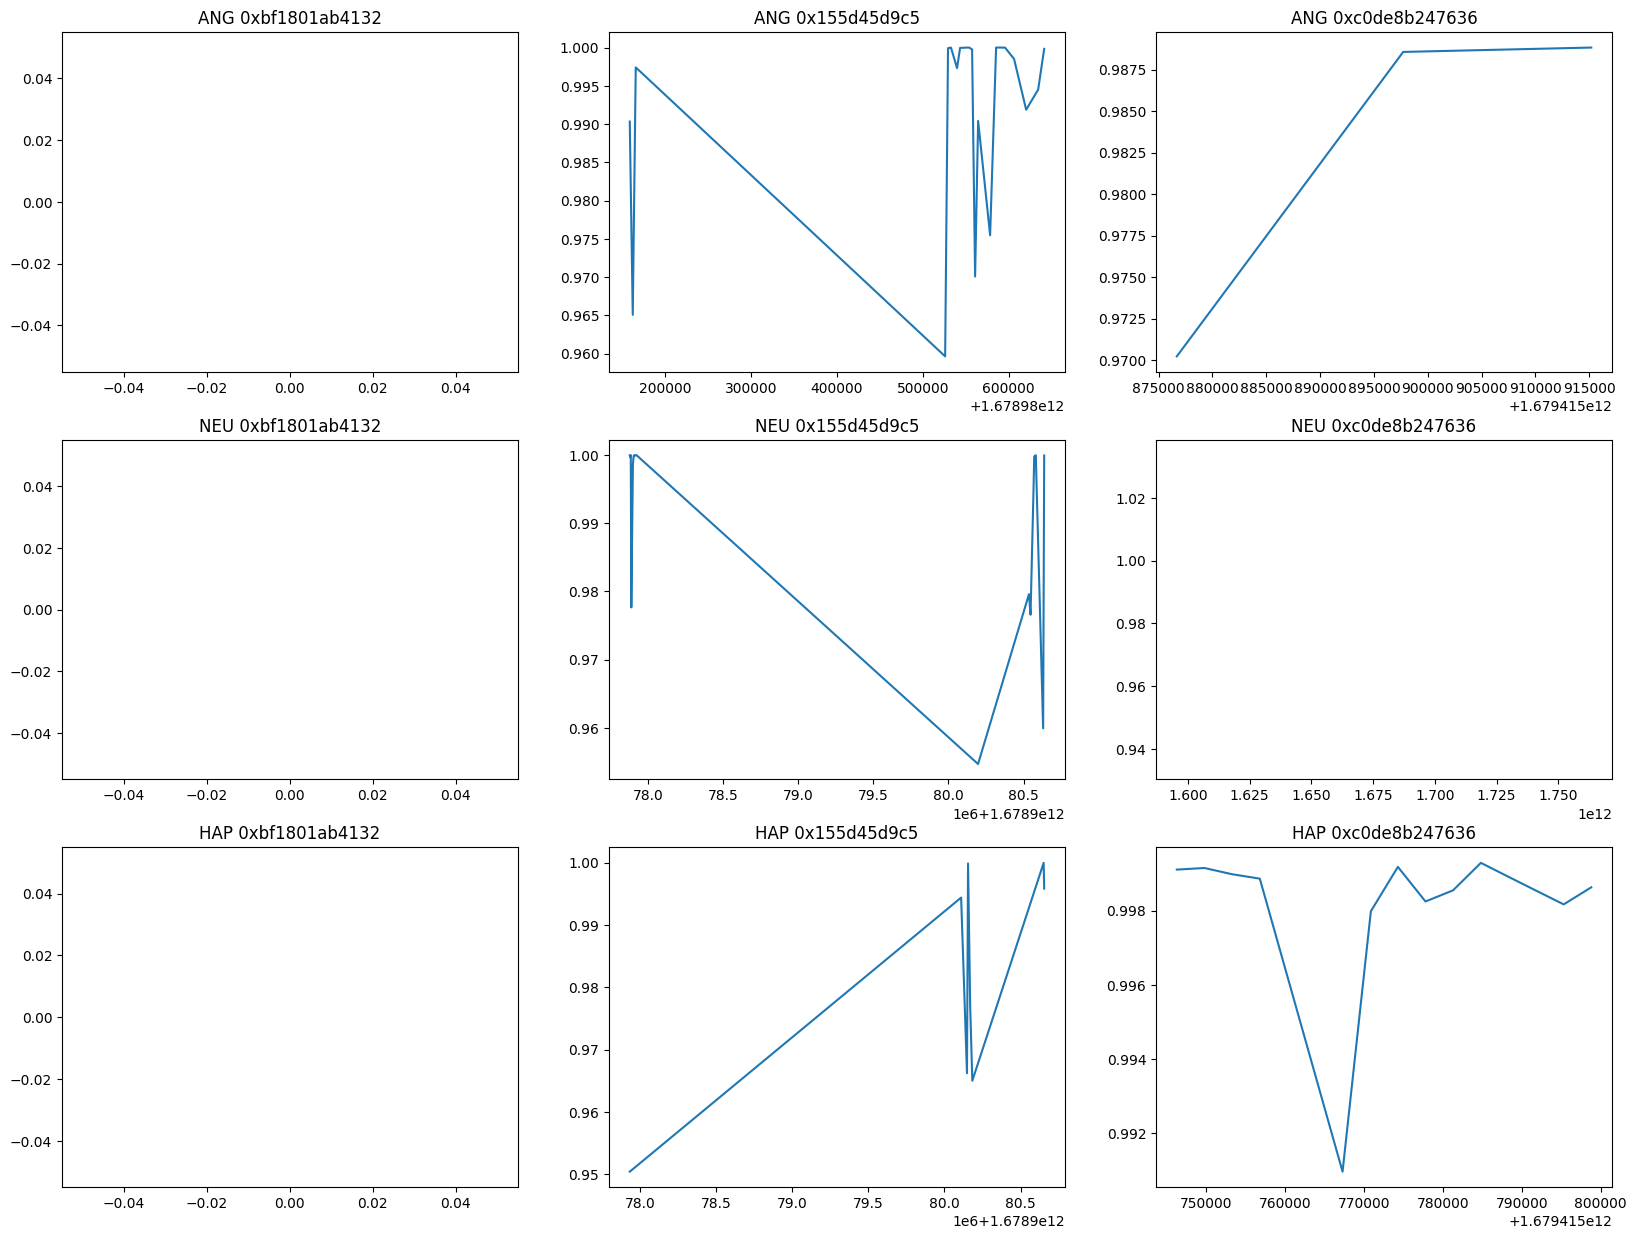

"# 3. Delete the data of the last device in the device list\nlast_device = devices['mac_addresses'][-1]\nrequests.delete(host + f'/device/{last_device}')\n"

In [6]:
# 1. Retrieve and print the list of monitored devices
response = requests.get(host + '/devices')
if response.status_code == 200:
    devices = json.loads(response.text) # response text is a dict but passed as a str, loading with json converts to dict
    print(f'Monitored macs: {devices}')
else:
    print('exiting 1')
    exit()

# 2. For each device, retrieve the information from a given time range and plot
#nmacs = len(devices['mac_addresses']) riga LUCA
nmacs = len(devices['macs'])
i = 0
fig, axs = plt.subplots(3, nmacs, figsize=(20,15))



for mac in devices['macs']:                          #devices['mac_addresses']:
    print(f'Mac address of the device: {mac}')
    # Make a GET request to the /status endpoint to retrieve the battery status for the specified time range
    # Specify the request query parameters with the "params" argument of the get method.
    payload = {"from": start_timestamp, "to": end_timestamp}
    response = requests.get(host + f'/device/{mac}', params=payload)

    if response.status_code == 200:
        content_response = json.loads(response.text)
        # Extract the content from the response
        timeseries_ANG = content_response['timeseries_ANG']
        timeseries_NEU= content_response['timeseries_NEU']
        timeseries_HAP = content_response['timeseries_HAP']
        labels = content_response['labels']
        
        # Plot the confidence over time
        print(f"For the mac address {mac} in the timeframe from {start_timestamp} to {end_timestamp} the data retrieved is: ")
        print("ANG values are: ")
        print(timeseries_ANG)
        print("NEU values are: ")
        print(timeseries_NEU)
        print("HAP values are: ")
        print(timeseries_HAP)

        axs[0, i].plot(*zip(*timeseries_ANG))
        axs[0, i].set_title(f'ANG {mac}')

        axs[1, i].plot(*zip(*timeseries_NEU))
        axs[1, i].set_title(f'NEU {mac}')

        axs[2, i].plot(*zip(*timeseries_HAP))
        axs[2, i].set_title(f'HAP {mac}')

        i = i+1
               
    else:
        print('exiting 2')
        exit()

plt.show()

'''# 3. Delete the data of the last device in the device list
last_device = devices['mac_addresses'][-1]
requests.delete(host + f'/device/{last_device}')
'''


Monitored macs: {'macs': ['0xbf1801ab4132', '0x155d45d9c5', '0xc0de8b247636']}
Mac address of the device: 0xbf1801ab4132
For the mac address 0xbf1801ab4132 in the timeframe from 1678977877374 to 1679416377196 the data retrieved is: 
ANG values are: 
[]
NEU values are: 
[]
HAP values are: 
[]
Mac address of the device: 0x155d45d9c5
For the mac address 0x155d45d9c5 in the timeframe from 1678977877374 to 1679416377196 the data retrieved is: 
ANG values are: 
[[1678980158734, 0.9903343319892883], [1678980162227, 0.9650741815567017], [1678980165719, 0.997410237789154], [1678980525996, 0.9596492648124695], [1678980529351, 0.9999169111251831], [1678980532753, 0.999993085861206], [1678980539856, 0.9973108768463135], [1678980543388, 0.9999517202377319], [1678980550372, 0.999993085861206], [1678980553849, 1.0], [1678980557374, 0.9997559189796448], [1678980560877, 0.9700835347175598], [1678980564414, 0.990409255027771], [1678980578370, 0.9754738807678223], [1678980585331, 1.0], [1678980588842, 1.

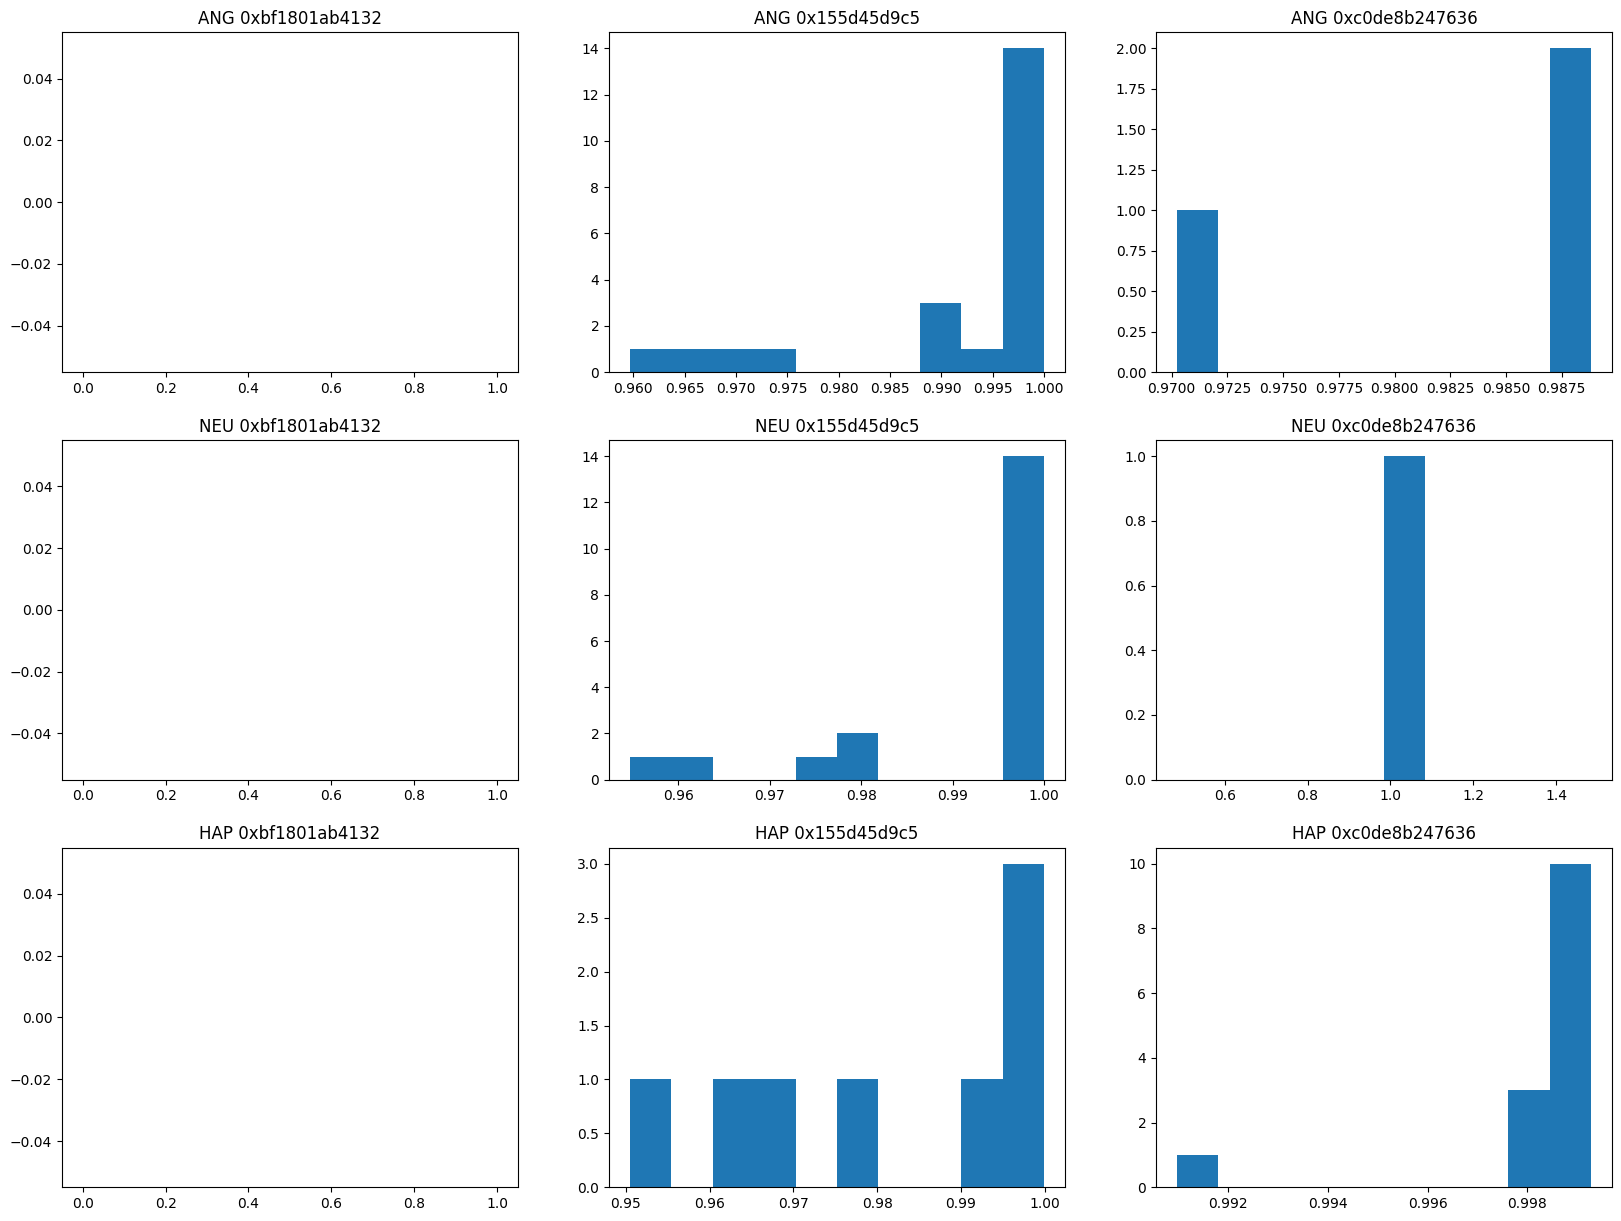

In [7]:
# 1. Retrieve and print the list of monitored devices
response = requests.get(host + '/devices')
if response.status_code == 200:
    devices = json.loads(response.text) # response text is a dict but passed as a str, loading with json converts to dict
    print(f'Monitored macs: {devices}')
else:
    print('exiting 1')
    exit()

# 2. For each device, retrieve the information from a given time range and plot
#nmacs = len(devices['mac_addresses']) riga LUCA
nmacs = len(devices['macs'])
i = 0
fig, axs = plt.subplots(3, nmacs, figsize=(20,15))


for mac in devices['macs']:                          #devices['mac_addresses']:
    print(f'Mac address of the device: {mac}')
    # Make a GET request to the /status endpoint to retrieve the battery status for the specified time range
    # Specify the request query parameters with the "params" argument of the get method.
    payload = {"from": start_timestamp, "to": end_timestamp}
    response = requests.get(host + f'/device/{mac}', params=payload)

    if response.status_code == 200:
        content_response = json.loads(response.text)
        # Extract the content from the response
        timeseries_ANG = content_response['timeseries_ANG']
        timeseries_NEU= content_response['timeseries_NEU']
        timeseries_HAP = content_response['timeseries_HAP']
        labels = content_response['labels']
        
        # Plot the confidence over time
        print(f"For the mac address {mac} in the timeframe from {start_timestamp} to {end_timestamp} the data retrieved is: ")
        print("ANG values are: ")
        print(timeseries_ANG)
        print("NEU values are: ")
        print(timeseries_NEU)
        print("HAP values are: ")
        print(timeseries_HAP)

        values_ANG = [x[1] for x in timeseries_ANG]
        values_NEU = [x[1] for x in timeseries_NEU]
        values_HAP = [x[1] for x in timeseries_HAP]

        axs[0, i].hist(values_ANG)
        axs[0, i].set_title(f'ANG {mac}')

        axs[1, i].hist(values_NEU)
        axs[1, i].set_title(f'NEU {mac}')

        axs[2, i].hist(values_HAP)
        axs[2, i].set_title(f'HAP {mac}')

        # print the mean value of confidence
        if(len(values_ANG) !=0):
            print(f"The mean confidence in ANG is {sum(values_ANG) / len(values_ANG)}")
        if(len(values_NEU) !=0):
            print(f"The mean confidence in NEU is {sum(values_NEU) / len(values_NEU)}")
        if(len(values_HAP) !=0):
            print(f"The mean confidence in HAP is {sum(values_HAP) / len(values_HAP)}")
        if(len(values_ANG) + len(values_NEU) + len(values_HAP) != 0):
            print(f"The mean confidence overall is {(sum(values_HAP) + sum(values_NEU) + sum(values_ANG)) / (len(values_HAP) + len(values_NEU) + len(values_ANG))}")


        i = i+1
               
    else:
        print('exiting 2')
        exit()

plt.show()

In [0]:
'''
# Se si vuole testare da locale copiare queste in un file .http su visual studio code e fare le varie chiamate
@host = https://0251bcdd-4ed1-43c6-b2b4-37ee69274d9e.deepnoteproject.com

###
GET {{host}}/serverstatus

###
GET {{host}}/devices

###
DELETE {{host}}/devices

###
GET {{host}}/device/0xbf1801ab4132

###
GET {{host}}/device/0xbf1801ab4132?from=1677775537200&to=1677775561810

###
DELETE {{host}}/device/0xbf1801ab4132

'''

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f648dc53-4e62-47c1-9023-194409755340' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>